<a href="https://colab.research.google.com/github/arsi-87/ml-product-reviews-project/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading and inspecting dataset
- Load dataset from GitHub
- Check how many rows and columns is in dataset
- Showing first 5 rows
- Review data types and basic metadata for each column

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/arsi-87/ml-product-reviews-project/main/data/product_reviews_full.csv"

df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()






Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


### Checking for missing values

In [15]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())



Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


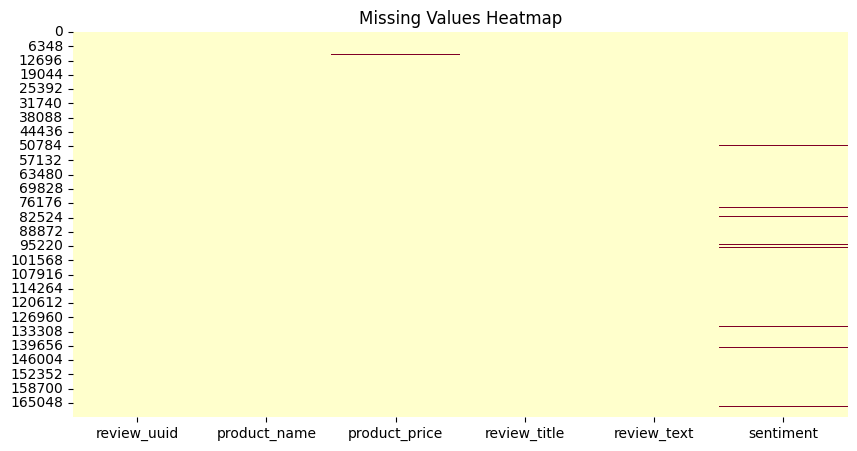

In [16]:
# Visualize missing data with seaborn heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

### Sentiment analysis

In [17]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


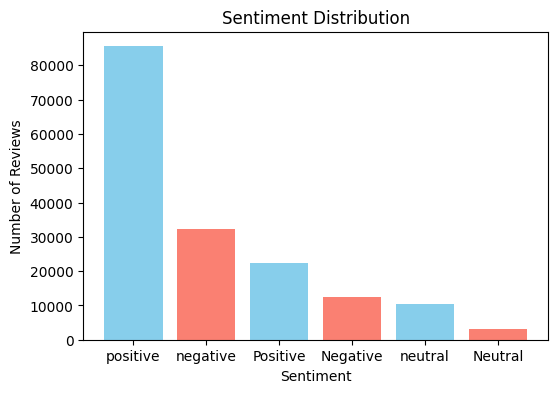

In [18]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

### Exploribg the product_price Column

In [19]:
# 1. Check the data type of the 'product_price' column
print(df['product_price'].dtype)

print("Show first 10 rows:\n")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

object
Show first 10 rows:

0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


### Removing missing values

In [20]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


### Parsing the product_price column

In [21]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)

df['product_price'] = pd.to_numeric (df['product_price_cleaned'], errors='coerce')

df = df.drop(columns=['product_price_cleaned'])
df = df.dropna(subset=['product_price'])
# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())

Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


### Standardizing column sentiment

In [22]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

Sentiment column converted to type: category


### Removing irrelevant columns

In [23]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])
print(df.columns.tolist())


['product_price', 'review_title', 'review_text', 'sentiment']


### Does product price affect sentiment

Price summary by sentiment:
              count       mean         std   min   25%    50%     75%      max
sentiment                                                                     
negative    44663.0  59.655028  112.306009  0.71  4.35  18.06  60.710  1566.14
neutral     13678.0  55.532342  107.524238  0.71  3.30  10.23  59.845  1204.70
positive   107619.0  69.635003  147.485845  0.18  4.20  14.08  66.250  1048.07


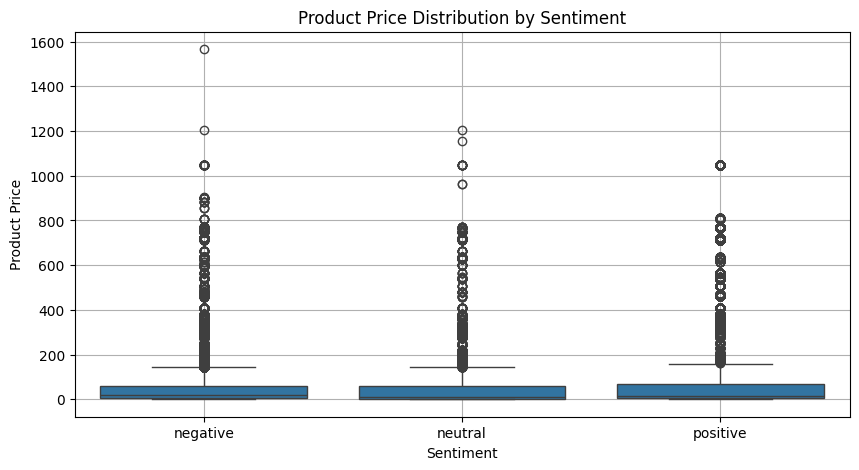

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()